In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("quantidade_municipio_nome_2010.csv")

In [8]:
df.head()

,id_municipio,nome,quantidade_nascimentos_ate_2010
0,1100015,Adao,36
1,1100015,Adelina,10
2,1100015,Adelson,10
3,1100015,Ademar,19
4,1100015,Ademir,46


In [12]:
df.shape

(1959116, 3)

In [14]:
df['nome'].isnull().sum()

0

In [142]:
df2=df.query("id_municipio == 3304557")

In [143]:
df2.head()

,id_municipio,nome,quantidade_nascimentos_ate_2010
1101583,3304557,Aana,24
1101584,3304557,Aarao,22
1101585,3304557,Aaron,27
1101586,3304557,Abadia,10
1101587,3304557,Abdala,10


In [144]:
df2 = df2.sort_values(by=['quantidade_nascimentos_ate_2010'], ascending=False)

In [145]:
df2.head()

,id_municipio,nome,quantidade_nascimentos_ate_2010
1111664,3304557,Maria,307018
1102623,3304557,Ana,120449
1109597,3304557,Jose,118239
1109351,3304557,Joao,78940
1103650,3304557,Carlos,73759


In [146]:
result = df2.dtypes
print(result)

id_municipio                        int64
nome                               object
quantidade_nascimentos_ate_2010     int64
dtype: object


In [201]:
df2['nome'] = df2['nome'].astype('string')

In [202]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15270 entries, 1111664 to 1116852
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id_municipio                     15270 non-null  int64 
 1   nome                             15270 non-null  string
 2   quantidade_nascimentos_ate_2010  15270 non-null  int64 
dtypes: int64(2), string(1)
memory usage: 477.2 KB


In [203]:
df3 = df2[df2['nome'].map(lambda x: len(str(x)) < 4)]

In [218]:
df3 = df3.nlargest(10, ['quantidade_nascimentos_ate_2010'])
df3.head(10)

,id_municipio,nome,quantidade_nascimentos_ate_2010
1102623,3304557,Ana,120449
1116617,3304557,Yan,2388
1110570,3304557,Lea,2306
1106615,3304557,Eva,2148
1112012,3304557,Max,1781
1108235,3304557,Ian,1664
1108755,3304557,Ivo,1584
1114427,3304557,Rui,1541
1102956,3304557,Ari,1326
1105812,3304557,Eli,1293


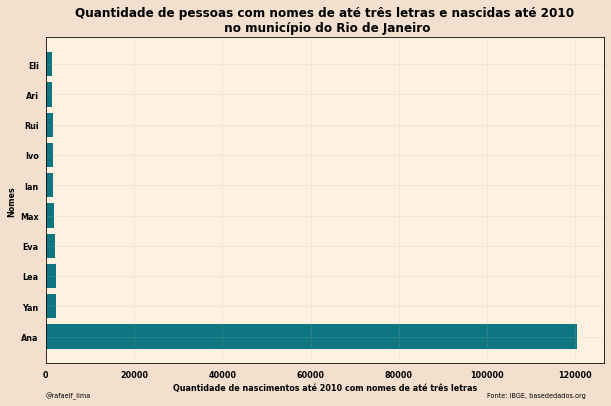

In [256]:
fig = plt.figure(figsize = (10,6), facecolor = "#F2DFCE")
ax=plt.axes()
plt.barh(df3['nome'], df3['quantidade_nascimentos_ate_2010'], color = "#0D7680")
plt.title("Quantidade de pessoas com nomes de até três letras e nascidas até 2010\n no município do Rio de Janeiro", 
          size = '12', fontweight = "bold", fontname = "sans")
plt.xticks(fontsize = 8, fontweight = "bold")
plt.yticks(fontsize = 8, fontweight = "bold")
plt.xlabel("Quantidade de nascimentos até 2010 com nomes de até três letras", fontname="Sans", size='8',fontweight="bold")
plt.ylabel("Nomes", fontname="Sans", size='8',fontweight="bold")
plt.tick_params(bottom=False)
plt.tick_params(left=False)
plt.text(6, -2, '@rafaelf_lima', size = '6.5')
plt.text(100000, -2, 'Fonte: IBGE, basededados.org', size = '6.5')
plt.grid(alpha = .2)
ax.set_facecolor("#FFF1E0")
plt.savefig("analisenomes.png", dpi = 100)
plt.show()